# Report Koshkina Polina 89221044

**Dataset: https://www.kaggle.com/datasets/rajeshrampure/black-friday-sale**

In [78]:
import pandas as pd

df = pd.read_csv('train.csv') # read the csv file


## Data Cleaning

In [79]:
missing_values = df.isnull().sum()
print(missing_values)

duplicates = df.duplicated().sum()
print(f'Dublicates: {duplicates}')

print(df.dtypes)
df.info()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            173638
Product_Category_3            383247
Purchase                           0
dtype: int64
Dublicates: 0
User_ID                         int64
Product_ID                     object
Gender                         object
Age                            object
Occupation                      int64
City_Category                  object
Stay_In_Current_City_Years     object
Marital_Status                  int64
Product_Category_1              int64
Product_Category_2            float64
Product_Category_3            float64
Purchase                        int64
dtype: object
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 en

In [80]:
print(df['Product_Category_2'].value_counts()) # to get the count of each value in the column
print(df['Product_Category_3'].value_counts())

Product_Category_2
8.0     64088
14.0    55108
2.0     49217
16.0    43255
15.0    37855
5.0     26235
4.0     25677
6.0     16466
11.0    14134
17.0    13320
13.0    10531
9.0      5693
12.0     5528
10.0     3043
3.0      2884
18.0     2770
7.0       626
Name: count, dtype: int64
Product_Category_3
16.0    32636
15.0    28013
14.0    18428
17.0    16702
5.0     16658
8.0     12562
9.0     11579
12.0     9246
13.0     5459
6.0      4890
18.0     4629
4.0      1875
11.0     1805
10.0     1726
3.0       613
Name: count, dtype: int64


In [81]:
# fill the missing values with the mode of the column
df['Product_Category_2'] = df['Product_Category_2'].fillna(8.0) 
df['Product_Category_3'] = df['Product_Category_3'].fillna(16.0)
df.head(15)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8.0,16.0,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,8.0,16.0,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,16.0,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,8.0,16.0,7969
5,1000003,P00193542,M,26-35,15,A,3,0,1,2.0,16.0,15227
6,1000004,P00184942,M,46-50,7,B,2,1,1,8.0,17.0,19215
7,1000004,P00346142,M,46-50,7,B,2,1,1,15.0,16.0,15854
8,1000004,P0097242,M,46-50,7,B,2,1,1,16.0,16.0,15686
9,1000005,P00274942,M,26-35,20,A,1,1,8,8.0,16.0,7871


In [82]:
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn import svm, preprocessing
import pandas as pd
df.describe() # statistic info about dataset

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,5.500680e+05,550068.000000,550068.000000,550068.000000,550068.000000,550068.000000,550068.000000
mean,1.003029e+06,8.076707,0.409653,5.404270,9.260768,14.989567,9263.968713
std,1.727592e+03,6.522660,0.491770,3.936211,4.294093,2.739846,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,2.000000,3.000000,12.000000
25%,1.001516e+06,2.000000,0.000000,1.000000,8.000000,16.000000,5823.000000
50%,1.003077e+06,7.000000,0.000000,5.000000,8.000000,16.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,14.000000,16.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,18.000000,18.000000,23961.000000


In [83]:
plt.style.use('ggplot')


# Distribution of purchases

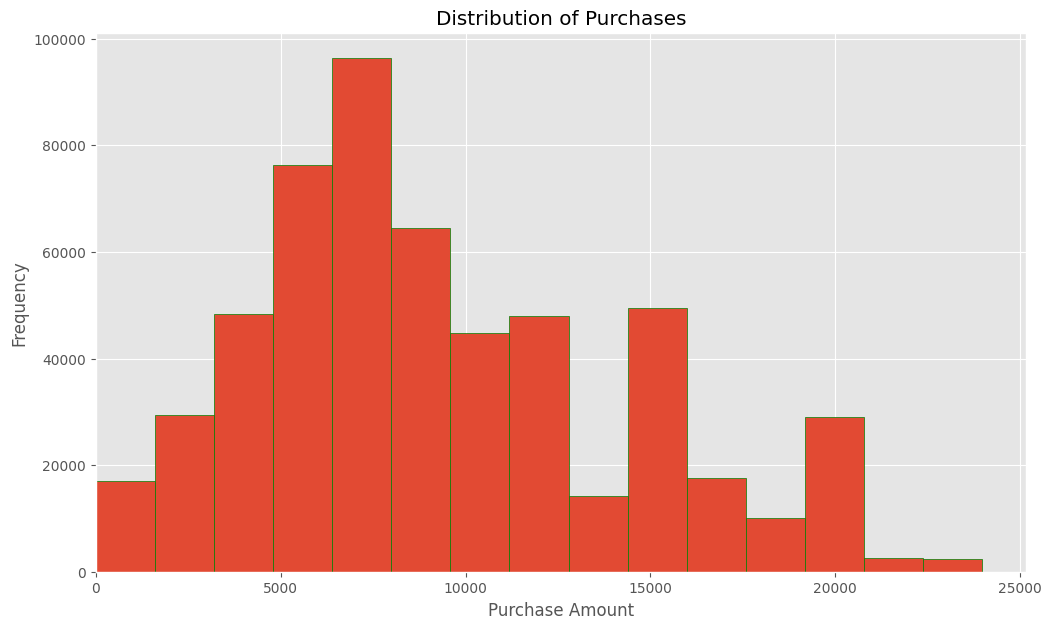

In [84]:
purchase_d=df['Purchase']
plt.figure(figsize=(12,7))
purchase_d.plot(kind='hist', bins=15, edgecolor='green', title='Distribution of Purchases')
plt.xlim(left=0)
plt.xlabel('Purchase Amount')
plt.ylabel('Frequency')
plt.show()

# Data analysis

## Gender distribution

array([<Axes: ylabel='User_ID'>], dtype=object)

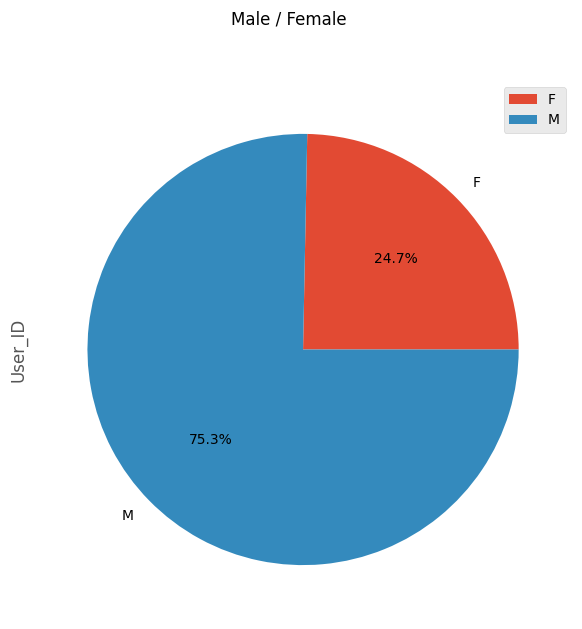

In [85]:
gender_count=df[['Gender','User_ID']].groupby('Gender').count()
gender_count
plt.style.use('ggplot')
gender_count.plot(kind='pie',autopct='%1.1f%%',subplots=True,title='Male / Female',figsize=(11,7))

## Total number of purchases by marital status

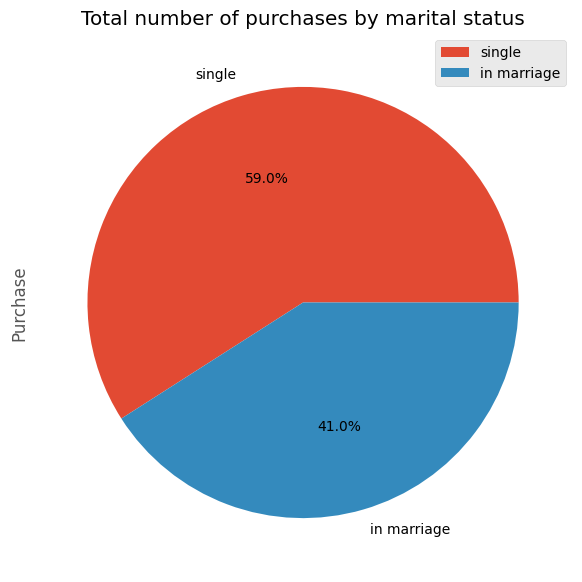

In [86]:
status_pu = df[['Marital_Status', 'Purchase']].groupby('Marital_Status').sum() # group by marital status and sum the purchases

status_labels = {0: 'single', 1: 'in marriage'}
status_pu.index = status_pu.index.map(status_labels)

status_pu.plot(kind='pie', y='Purchase', title='Total number of purchases by marital status', autopct='%1.1f%%', labels=status_pu.index, figsize=(12,7))
plt.show()

## Occupation status

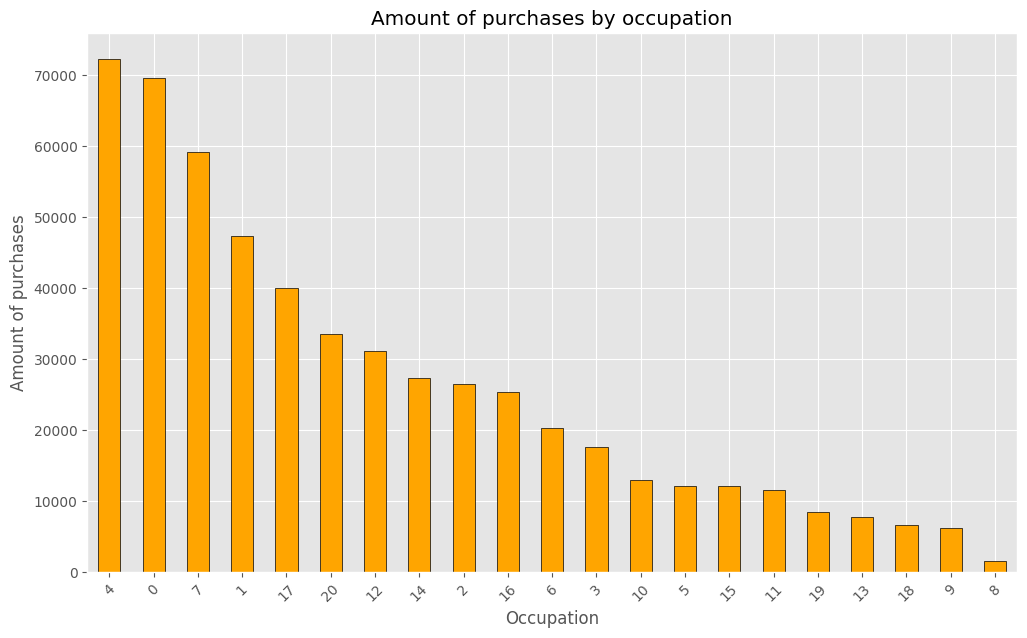

In [87]:
ocu_count = df[['Occupation', 'Purchase']].groupby('Occupation').count()
ocu_count = ocu_count.sort_values(by='Purchase', ascending=False)

# ploying the bar chart
plt.figure(figsize=(12, 7))
ocu_count['Purchase'].plot(kind='bar', color='orange', edgecolor='black')
plt.title('Amount of purchases by occupation')
plt.xlabel('Occupation')
plt.ylabel('Amount of purchases')
plt.xticks(rotation=45)
plt.show()

## Number of purchases by city

array([<Axes: ylabel='Purchase'>], dtype=object)

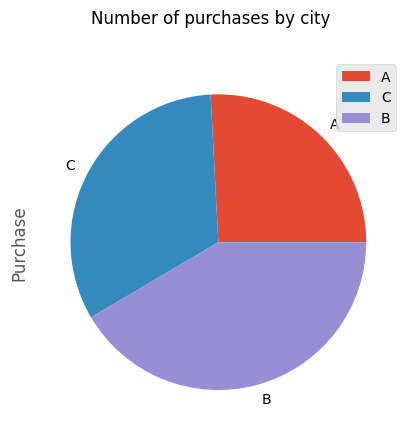

In [88]:
city_pu=df[['City_Category','Purchase']].groupby('City_Category').sum()
city_pu=city_pu.sort_values(by='Purchase')
city_pu.plot(kind='pie',subplots=True,title='Number of purchases by city')

## Distribution of purchases by age

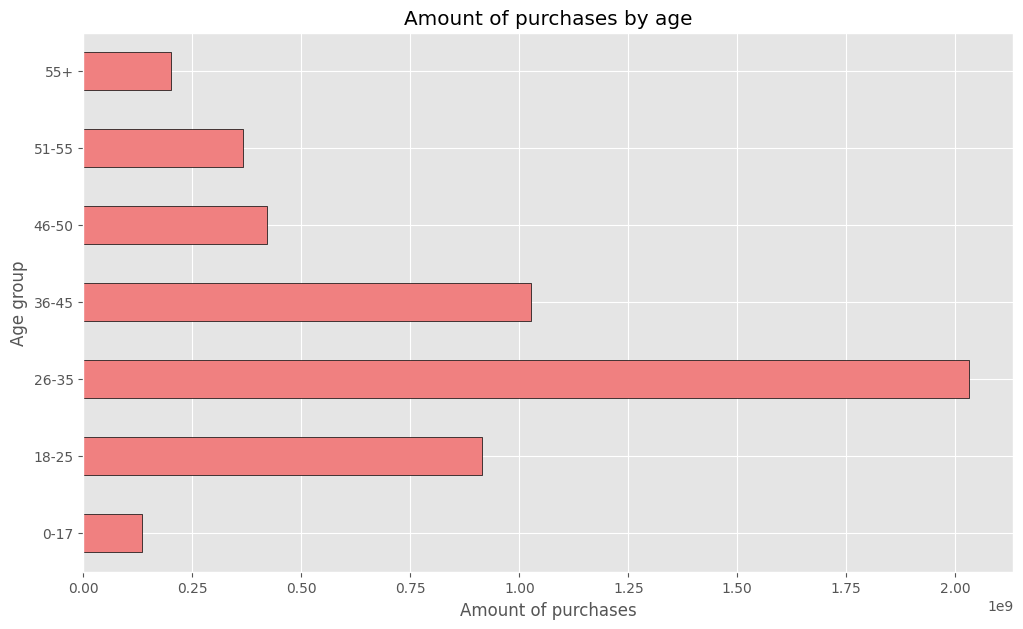

In [89]:
age_pu = df[['Age', 'Purchase']].groupby('Age').sum()
plt.figure(figsize=(12, 7))
age_pu['Purchase'].plot(kind='barh', color='lightcoral', edgecolor='black')
plt.title('Amount of purchases by age')
plt.xlabel('Amount of purchases')
plt.ylabel('Age group')
plt.show()


## Product category analysis

<Figure size 1200x700 with 0 Axes>

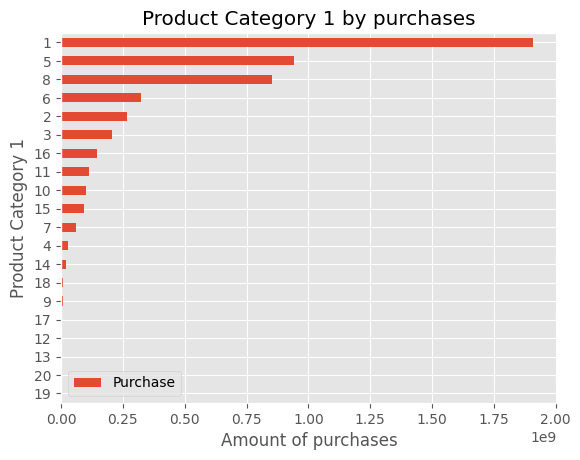

<Figure size 1200x700 with 0 Axes>

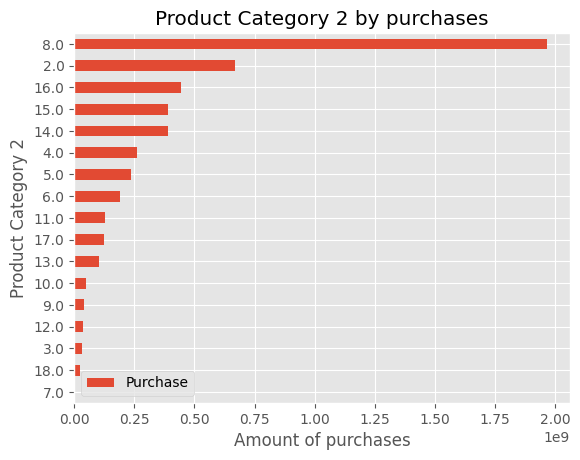

<Figure size 1200x700 with 0 Axes>

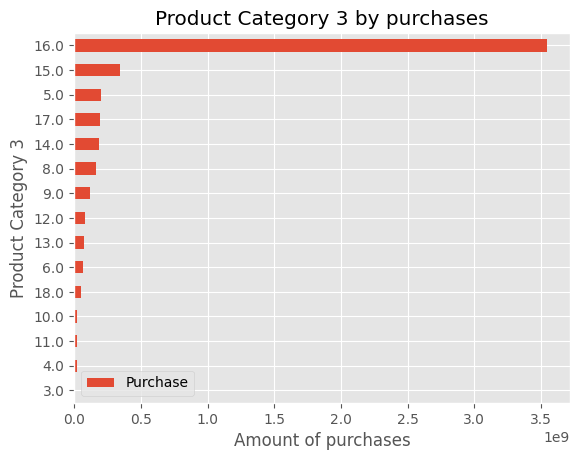

In [90]:
prod_pu1 = df[['Product_Category_1', 'Purchase']].groupby('Product_Category_1').sum()
prod_pu1 = prod_pu1.sort_values(by='Purchase')
plt.figure(figsize=(12, 7))
prod_pu1.plot(kind='barh', title='Product Category 1 by purchases')
plt.xlabel('Amount of purchases')
plt.ylabel('Product Category 1')
plt.show()

prod_pu2 = df[['Product_Category_2', 'Purchase']].groupby('Product_Category_2').sum()
prod_pu2 = prod_pu2.sort_values(by='Purchase')
plt.figure(figsize=(12, 7))
prod_pu2.plot(kind='barh', title='Product Category 2 by purchases')
plt.xlabel('Amount of purchases')
plt.ylabel('Product Category 2')
plt.show()

prod_pu3 = df[['Product_Category_3', 'Purchase']].groupby('Product_Category_3').sum()
prod_pu3 = prod_pu3.sort_values(by='Purchase')
plt.figure(figsize=(12, 7))
prod_pu3.plot(kind='barh', title='Product Category 3 by purchases')
plt.xlabel('Amount of purchases')
plt.ylabel('Product Category 3')
plt.show()

## Total purchases based on the number of years spent in the current city

<Figure size 1200x700 with 0 Axes>

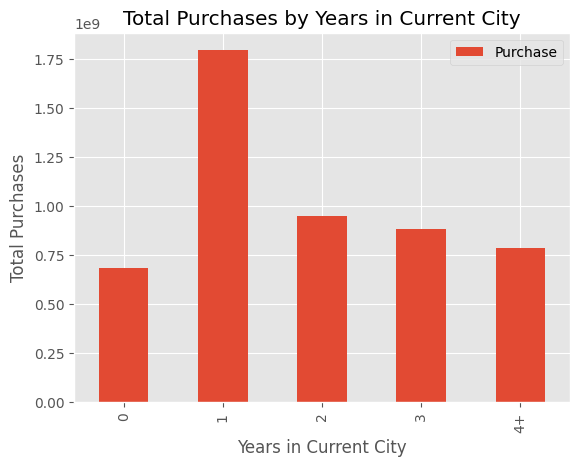

In [92]:
category_mapping = {
    '0': 0,
    '1': 1,
    '2': 2,
    '3': 3,
    '4+': 4  
}

df['Stay_In_Current_City_Years'] = df['Stay_In_Current_City_Years'].map(category_mapping) # map the values to the dictionary

city_dur = df[['Stay_In_Current_City_Years', 'Purchase']].groupby('Stay_In_Current_City_Years').sum() # group by the years in the city and sum the purchases
city_dur = city_dur.sort_index()

plt.figure(figsize=(12, 7))
city_dur.plot(kind='bar', xlabel='Years in Current City', ylabel='Total Purchases', title='Total Purchases by Years in Current City')
plt.xticks(ticks=range(len(category_mapping)), labels=list(category_mapping.keys()))
plt.show()

# Data correlation

In [93]:
df2=df.copy()

**Data encoding:**

In [95]:
df2['Gender']=pd.factorize(df2.Gender)[0]
df2['Age']=pd.factorize(df2.Age)[0]
df2['City_Category']=pd.factorize(df2.City_Category)[0]
df2['Stay_In_Current_City_Years']=pd.factorize(df2.Stay_In_Current_City_Years)[0]
df2['Product_ID']=pd.factorize(df2.Product_ID)[0]
df2['User_ID']=pd.factorize(df2.User_ID)[0]
df2['Product_Category_1']=pd.factorize(df2.Product_Category_1)[0]
df2['Product_Category_2']=pd.factorize(df2.Product_Category_2)[0]
df2['Product_Category_3']=pd.factorize(df2.Product_Category_3)[0]

In [97]:
df2.corr()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
User_ID,1.000000,0.004389,-0.038275,-0.039948,-0.023348,0.023497,0.003509,0.025181,0.010296,0.001462,0.000051,0.006735
Product_ID,0.004389,1.000000,-0.016938,-0.006908,-0.004188,-0.013383,0.007775,0.013193,0.286762,-0.054216,-0.153342,-0.249081
Gender,-0.038275,-0.016938,1.000000,-0.000777,0.117291,-0.007688,-0.015108,-0.011603,-0.006406,0.021354,0.028222,0.060346
Age,-0.039948,-0.006908,-0.000777,1.000000,-0.040858,0.042006,0.007013,-0.078776,-0.006687,0.005919,0.006968,0.002344
Occupation,-0.023348,-0.004188,0.117291,-0.040858,1.000000,0.005470,-0.010470,0.024280,0.003964,0.007903,0.006677,0.020833
City_Category,0.023497,-0.013383,-0.007688,0.042006,0.005470,1.000000,-0.011205,0.016846,-0.006594,0.011344,0.010457,0.011513
Stay_In_Current_City_Years,0.003509,0.007775,-0.015108,0.007013,-0.010470,-0.011205,1.000000,0.010461,0.003440,-0.001359,-0.003962,-0.007504
Marital_Status,0.025181,0.013193,-0.011603,-0.078776,0.024280,0.016846,0.010461,1.000000,0.011935,-0.003627,-0.008456,-0.000463
Product_Category_1,0.010296,0.286762,-0.006406,-0.006687,0.003964,-0.006594,0.003440,0.011935,1.000000,-0.110202,-0.212890,-0.130190
Product_Category_2,0.001462,-0.054216,0.021354,0.005919,0.007903,0.011344,-0.001359,-0.003627,-0.110202,1.000000,0.207667,0.101948


<Axes: >

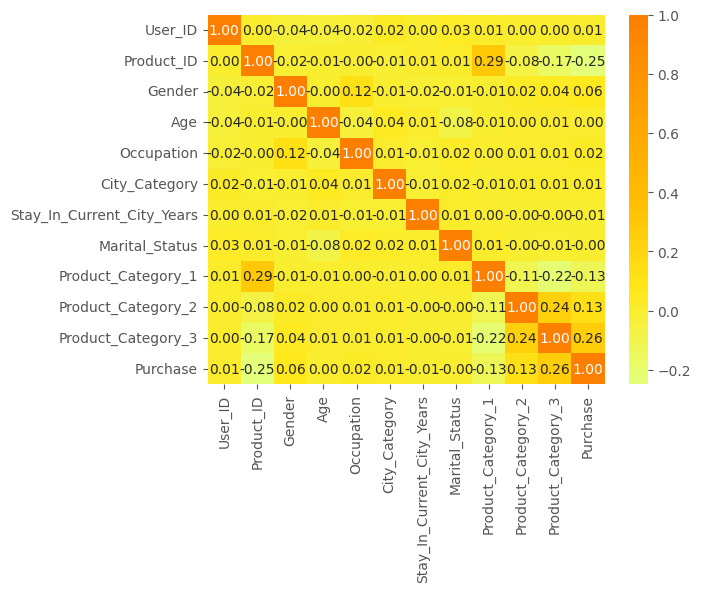

In [31]:
sns.heatmap(df2.corr(), annot = True, cmap= 'Wistia', fmt= '.2f')

**We observe that age, gender and occupation have a minimal impact on purchase amount, while product categories (especially category 3) and product identifiers have a more noticeable impact on purchase amount.**

# Model to predict the Purchase values using a random forest regressor

In [113]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn import preprocessing
import matplotlib.pyplot as plt

In [103]:
X= df2.values[:,0:11] # first 11 columns as features
Y= df2.values[:, 11] # # 12th column as target (Purchase)
X= preprocessing.scale(X) # scale the features to standardize the data

**Splitting Data into Training and Testing Sets:**

In [104]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.30, random_state = 100)

**Training the RandomForestRegressor Model**

In [105]:
rfr = RandomForestRegressor()
rfr.fit(X_train,y_train)

RandomForestRegressor()

**Calculate the R^2 score on the training data**

In [106]:
train_score = rfr.score(X_train, y_train)
print(f"Training R^2 score: {train_score}")

Training R^2 score: 0.958133926218183


**Predict on the test set**

In [107]:
y_pred = rfr.predict(X_test)
rscore = r2_score(y_test, y_pred)
print(f"Test R^2 score: {rscore}")

Test R^2 score: 0.6984275773684855


**Hyperparameter Tuning using GridSearchCV**

In [108]:
df2['Prediction']=rfr.predict(X) # add the prediction column to the dataset

**The comparison between actual and predicted purchases**

In [116]:
df2.head(10)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,Prediction
0,0,0,0,0,10,0,0,0,0,0,0,8370,9446.22
1,0,1,0,0,10,0,0,0,1,1,1,15200,15055.64
2,0,2,0,0,10,0,0,0,2,0,0,1422,1440.17
3,0,3,0,0,10,0,0,0,2,2,0,1057,1302.89
4,1,4,1,1,16,1,1,0,3,0,0,7969,7730.52
5,2,5,1,2,15,0,2,0,1,3,0,15227,14080.68
6,3,6,1,3,7,2,0,1,1,0,2,19215,14875.73
7,3,7,1,3,7,2,0,1,1,4,0,15854,15712.45
8,3,8,1,3,7,2,0,1,1,5,0,15686,15013.24
9,4,9,1,2,20,0,3,1,3,0,0,7871,7007.73


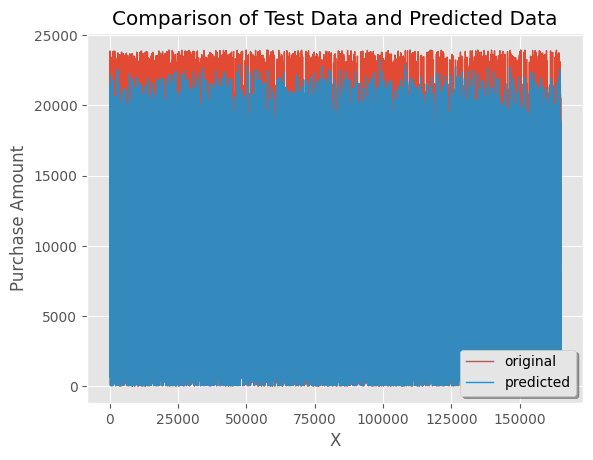

In [117]:
x_ax = range(len(y_test))
plt.plot(x_ax, y_test, linewidth = '1', label="original")
plt.plot(x_ax, y_pred, linewidth = '1', label="predicted")
plt.title("Comparison of Test Data and Predicted Data")
plt.xlabel('X')
plt.ylabel('Purchase Amount')
plt.legend(loc='lower right',fancybox=True, shadow=True)
plt.show()

**The accuracy is 70% on the test dataset: It means that the model explains 70% of the variation in the target variable (purchase amount) on new data that it did not see during training. This indicates that the model has an acceptable ability to generalize, which means that it can make good performance on data that was not used in its training. However, we should keep in mind that the quality of the model can be improved and the results could vary depending on the data and tasks. A result of 70% confirms that the model has not been over-trained and is able to generalize to new data, which is a positive indicator of its performance. The graph shows how close the model predictions are to the actual values.**